In [0]:
from fastai import *
from fastai.vision import *

In [0]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



In [0]:
URLs.PETS

'https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet'

In [0]:
path = untar_data(URLs.PETS)
path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [0]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images')]

In [0]:
path_anno = path/'annotations'
path_img = path/'images'

In [0]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/saint_bernard_40.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Abyssinian_89.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/boxer_89.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/pug_188.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/staffordshire_bull_terrier_173.jpg')]

In [0]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [0]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms = get_transforms(), size = 224)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
saint_bernard,Abyssinian,boxer,shiba_inu,pug
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Egyptian_Mau,yorkshire_terrier,miniature_pinscher,american_bulldog,keeshond
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None

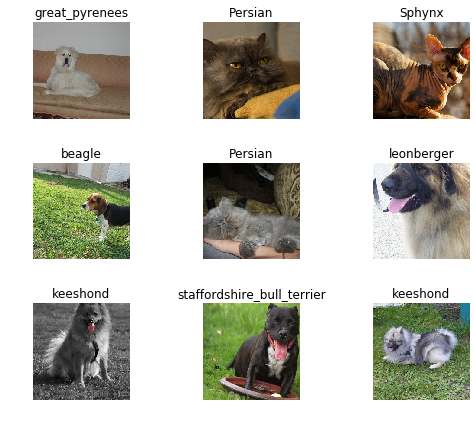

In [0]:
data.show_batch(rows = 3 ,figsize = (7,6))

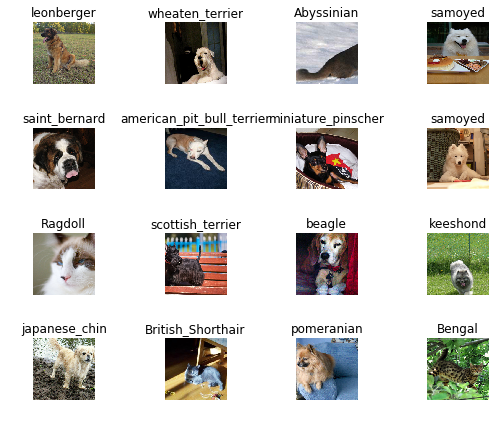

In [0]:
data.show_batch(rows = 4 ,figsize = (7,6))

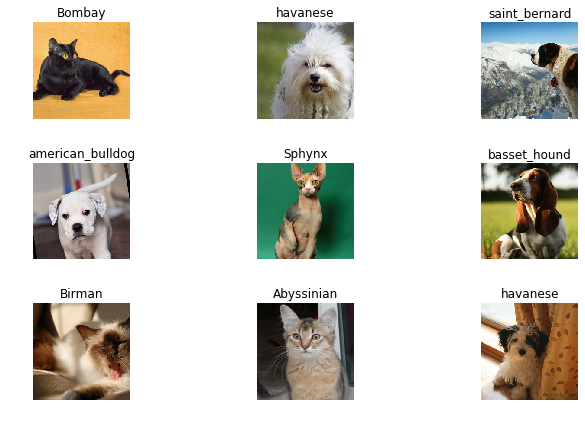

In [0]:
data.show_batch(rows = 3 ,figsize = (10,6))

In [0]:
print(data.classes)
len(data.classes),data.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:00<00:00, 97447918.65it/s]


In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.365235,0.329842,0.098106,01:24
1,0.546256,0.250272,0.081867,01:24
2,0.334240,0.231766,0.077808,01:24
3,0.252522,0.219458,0.072395,01:24


In [0]:
learn.save('stage-1')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

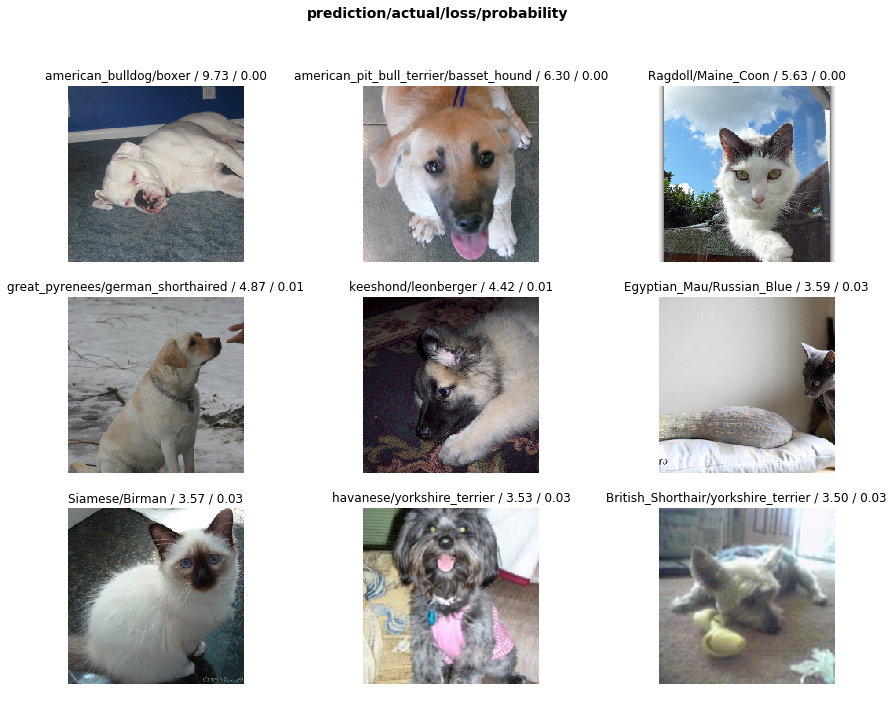

In [0]:
interp.plot_top_losses(9 , figsize = (15,11))

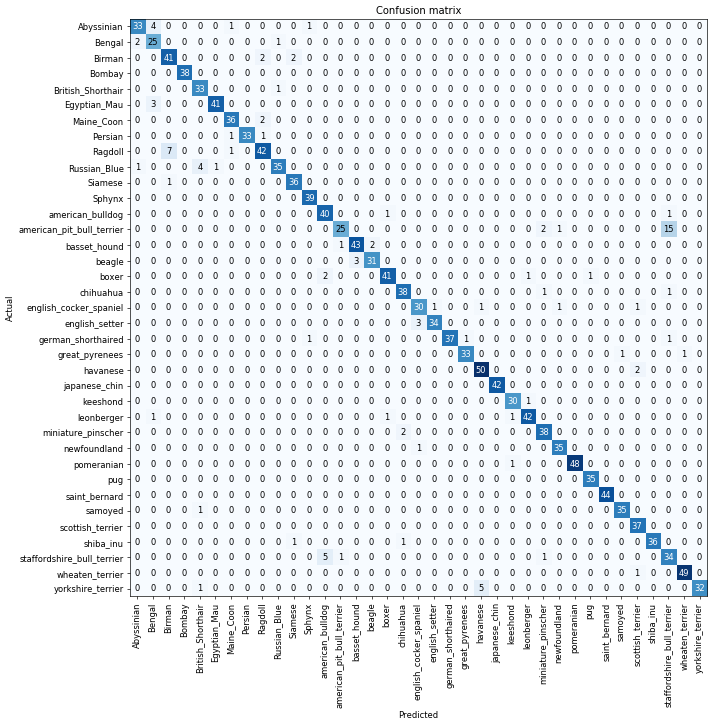

In [0]:
interp.plot_confusion_matrix(figsize=(12,12) ,dpi = 60)

In [0]:
interp.most_confused(min_val = 2)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 15),
 ('Ragdoll', 'Birman', 7),
 ('staffordshire_bull_terrier', 'american_bulldog', 5),
 ('yorkshire_terrier', 'havanese', 5),
 ('Abyssinian', 'Bengal', 4),
 ('Russian_Blue', 'British_Shorthair', 4),
 ('Egyptian_Mau', 'Bengal', 3),
 ('beagle', 'basset_hound', 3),
 ('english_setter', 'english_cocker_spaniel', 3),
 ('Bengal', 'Abyssinian', 2),
 ('Birman', 'Ragdoll', 2),
 ('Birman', 'Siamese', 2),
 ('Maine_Coon', 'Ragdoll', 2),
 ('american_pit_bull_terrier', 'miniature_pinscher', 2),
 ('basset_hound', 'beagle', 2),
 ('boxer', 'american_bulldog', 2),
 ('havanese', 'scottish_terrier', 2),
 ('miniature_pinscher', 'chihuahua', 2)]

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.551856,0.353224,0.106901,01:26


In [0]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
saint_bernard,Abyssinian,boxer,shiba_inu,pug
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Egyptian_Mau,yorkshire_terrier,miniature_pinscher,american_bulldog,keeshond
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stri

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


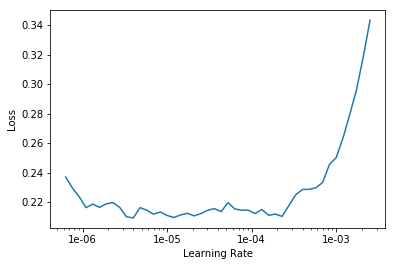

In [0]:
learn.recorder.plot()

In [0]:
learn.unfreeze()
learn.fit_one_cycle(2 ,max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.227564,0.212751,0.068336,01:26
1,0.207647,0.206086,0.066306,01:26
